In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, shapiro,kstest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
data= pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
pd.get_dummies(data.symboling.astype('category'),drop_first=True)

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
200,1,0,0,0,0
201,1,0,0,0,0
202,1,0,0,0,0
203,1,0,0,0,0


In [30]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### The columns- car_id and carname are unqiue value variables, hence, we drop those columns as it will not be useful for price prediction.

In [31]:
data.drop(columns=['car_ID','CarName'],inplace=True)

### Type Casting - converting object variables into categorical.

In [33]:
data[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']]=data[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   fueltype          205 non-null    category
 2   aspiration        205 non-null    category
 3   doornumber        205 non-null    category
 4   carbody           205 non-null    category
 5   drivewheel        205 non-null    category
 6   enginelocation    205 non-null    category
 7   wheelbase         205 non-null    float64 
 8   carlength         205 non-null    float64 
 9   carwidth          205 non-null    float64 
 10  carheight         205 non-null    float64 
 11  curbweight        205 non-null    int64   
 12  enginetype        205 non-null    category
 13  cylindernumber    205 non-null    category
 14  enginesize        205 non-null    int64   
 15  fuelsystem        205 non-null    category
 16  boreratio         205 non-

#### OUTLIER CHECK

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

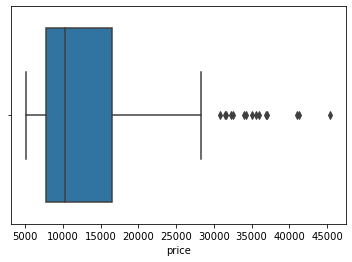

In [34]:
sns.boxplot(data['price'])

#### REMOVING THE OUTLIERS

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

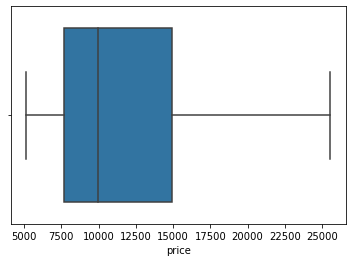

In [35]:
data=data.drop(data.index[data.price > 28000],axis=0)
sns.boxplot(data['price'])

#### Independent Variable

In [36]:

IDVN=data.select_dtypes(exclude='category').drop(columns=['price'])
IDVC=data.select_dtypes('category')
print('ID CATEGORICAL VARIABLES=',IDVC.shape)
print('ID NUMERICAL VARIABLES=',IDVN.shape)


ID CATEGORICAL VARIABLES= (188, 9)
ID NUMERICAL VARIABLES= (188, 14)


#### Dependent Variable

In [37]:
DV= data.iloc[:,-1]
DV.shape


(188,)

### Univariate Analysis

fueltype
diesel     17
gas       171
Name: fueltype, dtype: int64


<AxesSubplot:>

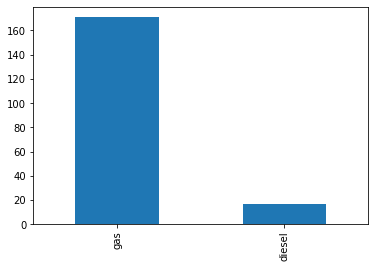

In [38]:

print(data.groupby(['fueltype'])['fueltype'].count())
data.fueltype.value_counts().plot.bar()

<AxesSubplot:xlabel='price', ylabel='Count'>

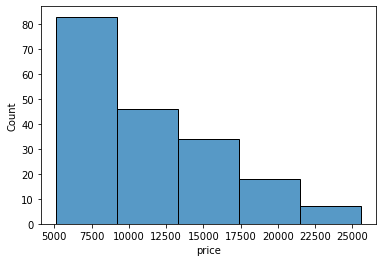

In [39]:
sns.histplot(data.price,bins=5)

#### Cars majorly range between 5000 to 10000.

sedan          87
hatchback      69
wagon          24
convertible     4
hardtop         4
Name: carbody, dtype: int64


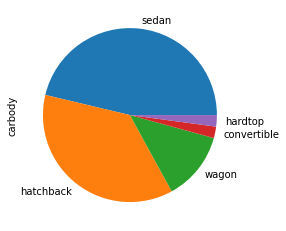

In [40]:
data.carbody.value_counts().plot.pie()
print(data.carbody.value_counts())


### Bivariate Analysis

#### Qn. Price range for each type of car

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carbody', ylabel='price'>

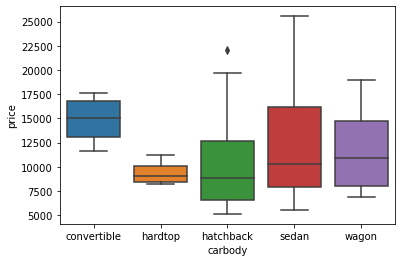

In [41]:
sns.boxplot(data.carbody,data.price)

Convertible cars ranges approx. between $13000  to $17000.

Hardtop cars ranges approx. between $8000  to $10000.

Hatchback cars ranges approx. between $6000  to $12500.
 
Sedan cars ranges approx. between $7500  to $17000.

Wagon cars ranges approx. between $7500  to $14500.

In [42]:
pd.pivot_table(data=data,index=['fueltype','doornumber','cylindernumber'],values=['price'],aggfunc={min,max})

price         
                                          max      min
fueltype doornumber cylindernumber                    
diesel   four       five            25552.000  25552.0
                    four            18344.000   7788.0
                    six             22470.000  22470.0
         two        four             7775.000   7099.0
gas      four       five            23875.000  13295.0
                    four            22625.000   6229.0
                    six             24565.000  13499.0
         two        five            17859.167  15250.0
                    four            22018.000   5118.0
                    six             20970.000  15998.0
                    three            5151.000   5151.0
                    two             15645.000  10945.0

#### Average price of cars based on  number of doors.

doornumber
four    11983.182243
two     10471.131691
Name: price, dtype: float64


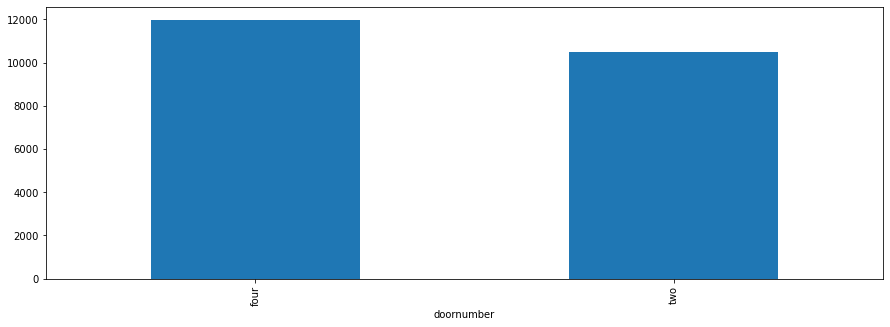

In [43]:
plt.figure(figsize=(15,5))
a= data.groupby(['doornumber'])['price'].mean()
a.plot(kind='bar')
print(data.groupby(['doornumber'])['price'].mean())

#### Qn. Average price of cars based on fuel type and number of doors.

In [44]:

print(data.groupby(['fueltype','doornumber'])['price'].mean())

fueltype  doornumber
diesel    four          14257.666667
          two            7437.000000
gas       four          11612.342391
          two           10547.945152
Name: price, dtype: float64


#### Qn.  List of Sedan cars that are priced below $30000 and of fueltype -diesel

In [45]:
data[(data.carbody =='sedan' )&(data.fueltype=='diesel')&(data.price<30000)]


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
63,0,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0
66,0,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
67,-1,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.0
90,1,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0
108,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150,28,33,13200.0
112,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150,28,33,16900.0
116,0,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150,28,33,17950.0
158,0,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
174,-1,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698.0
182,2,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775.0


#### Qn.  Count of cars of all bodytype and their producibility in 2 and 4  doornumbers

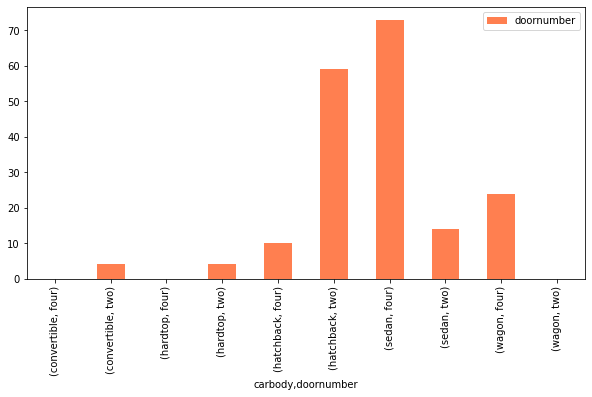

In [46]:
plt.figure(figsize=(10,5))
A=data.groupby(['carbody','doornumber'])['doornumber'].count()
A.plot(kind='bar', color='coral')
plt.legend(loc='best')



Convertible,Hardtop and Wagon cars are manufactured only in two doors category.

Hatchback and Sedan are manufactured in both two and four doors category.

In the four doors category - Sedan cars are manufactured the maximun.

In the two doors category - Sedan cars are manufactured the maximun.

Convertible cars are the least manufactured cars.

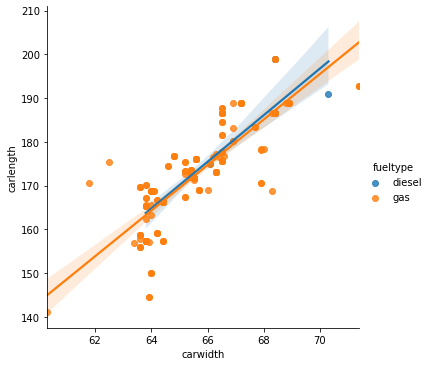

In [88]:
sns.lmplot(x='carwidth',y='carlength', data=data,hue='fueltype')

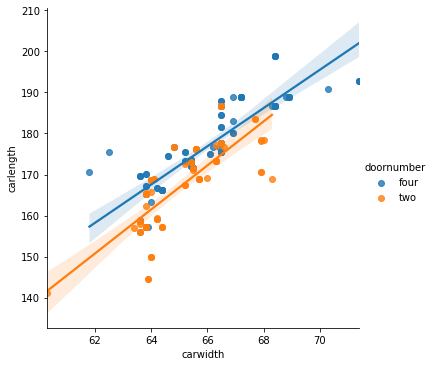

In [90]:
sns.lmplot(x='carwidth',y='carlength', data=data,hue='doornumber')

### Multi - Variate Analysis

<Figure size 1440x720 with 0 Axes>

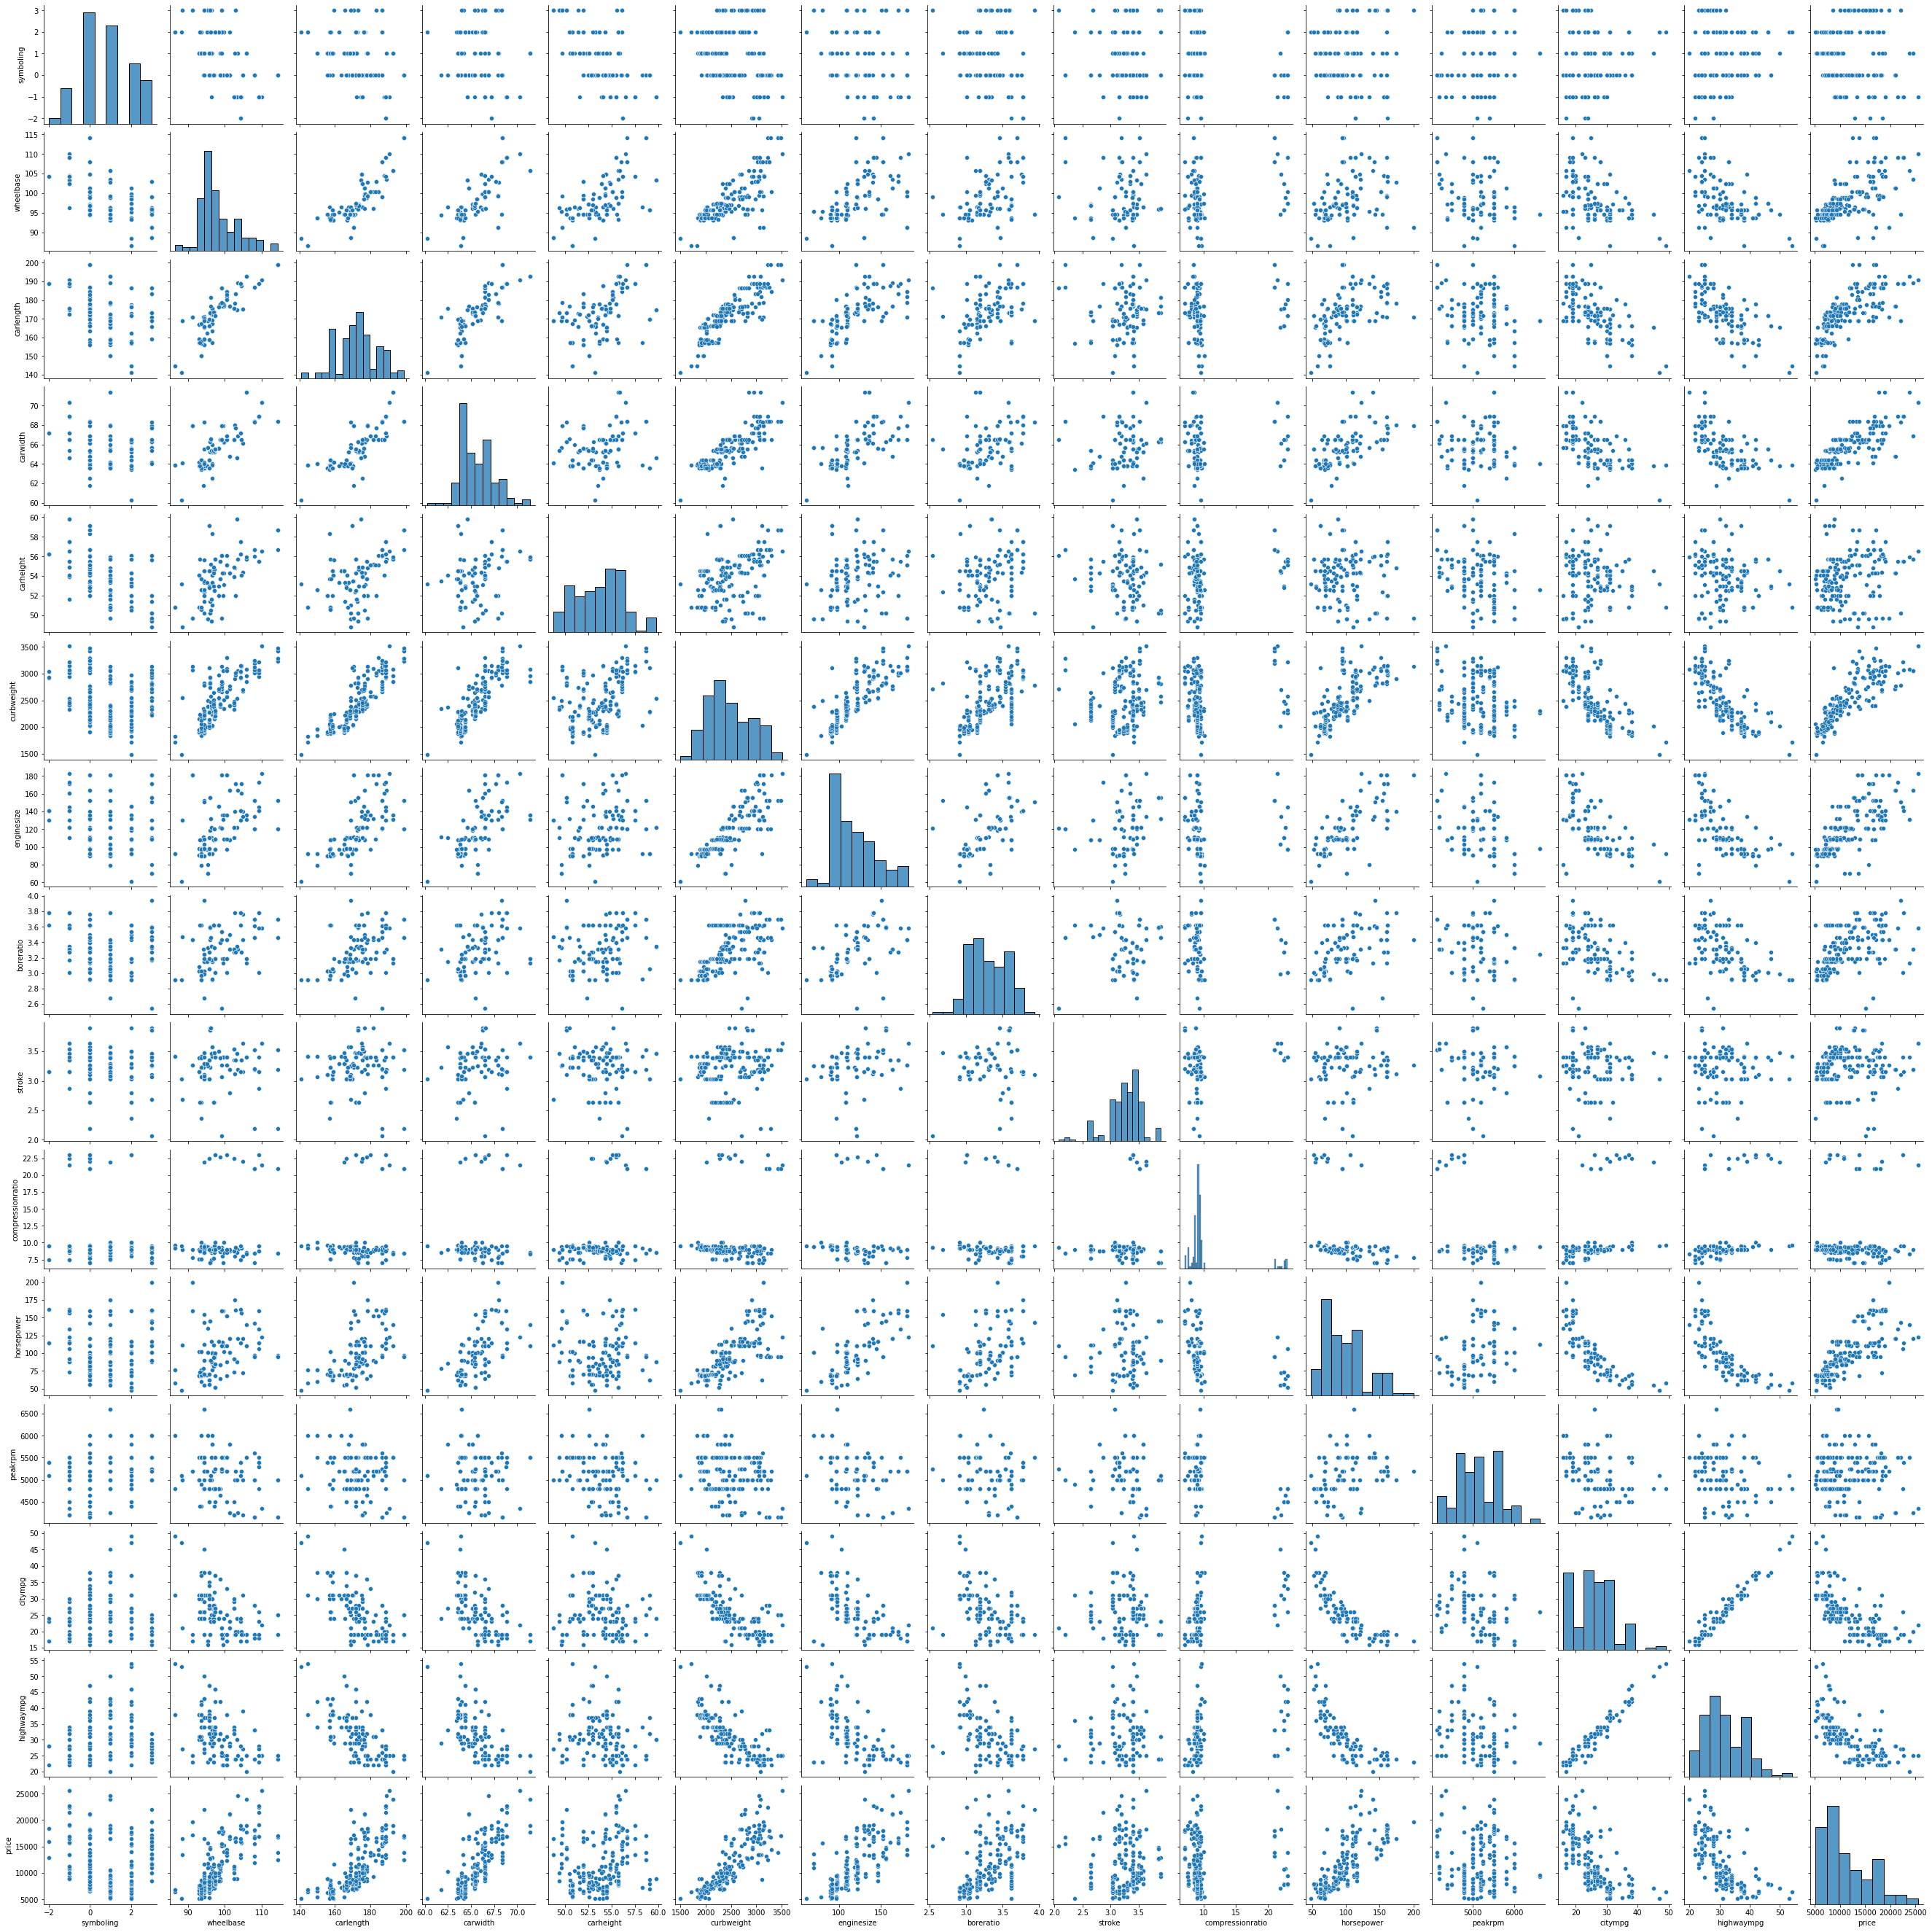

In [47]:
plt.figure(figsize=(20,10))
sns.pairplot(data)
plt.show()



### Normality Check

<AxesSubplot:xlabel='price', ylabel='Density'>

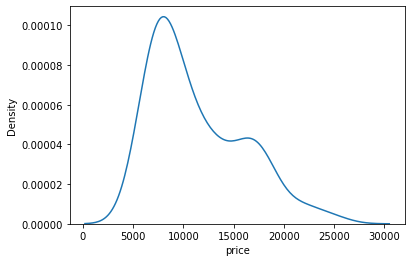

In [48]:
sns.kdeplot(DV)

#### The kdeplot shows that the dependent variable is not normally distributed. And also shows that the data is bimodal.

In [49]:
s,p = shapiro(DV)
print('Normality check: Dependent variable "price" \n')
if p>0.05:
    print('SIGNIFICANT: \n Price datapoints are normally distributed')
else:
    print('NOT SIGNIFICANT: \nPrice datapoints are not normally distributed')

Normality check: Dependent variable "price" 

NOT SIGNIFICANT: 
Price datapoints are not normally distributed


### Linearity Check

symboling vs Price


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


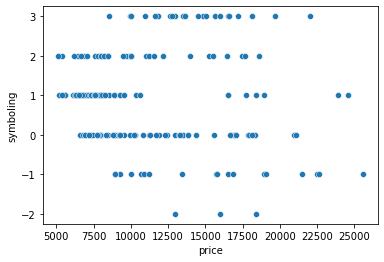

wheelbase vs Price


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


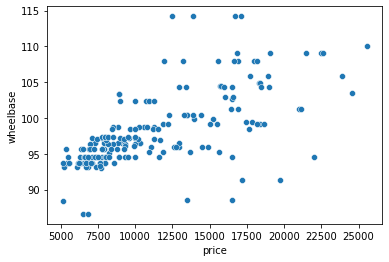

carlength vs Price


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


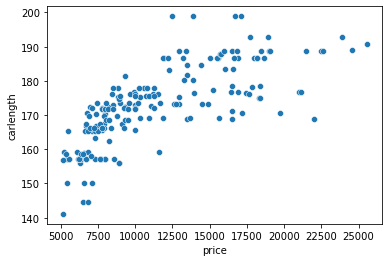

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


carwidth vs Price


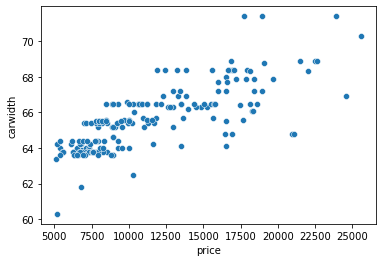

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


carheight vs Price


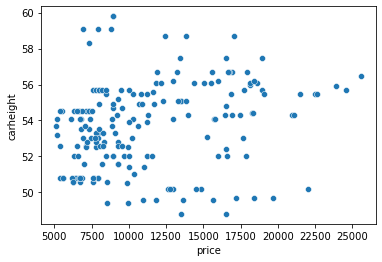

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


curbweight vs Price


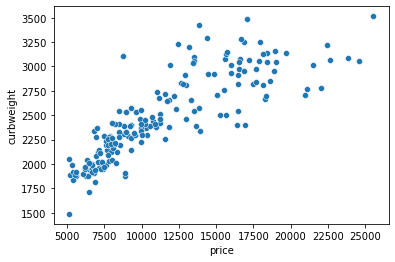

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


enginesize vs Price


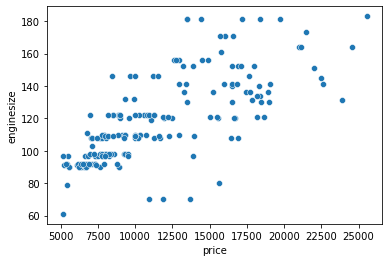

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


boreratio vs Price


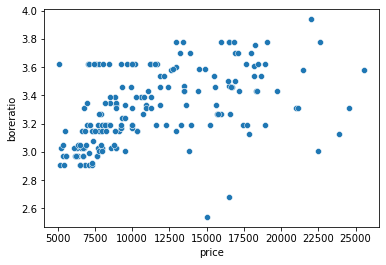

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


stroke vs Price


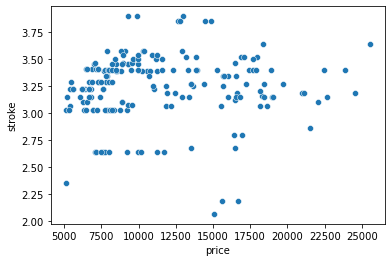

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


compressionratio vs Price


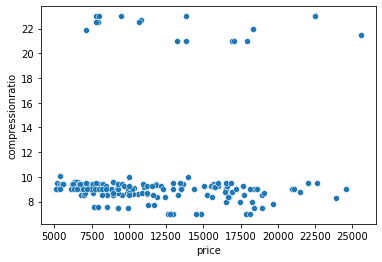

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


horsepower vs Price


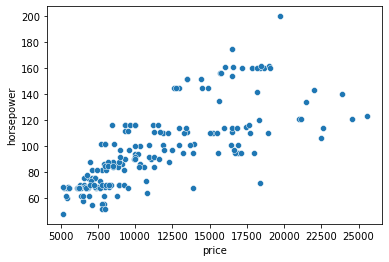

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


peakrpm vs Price


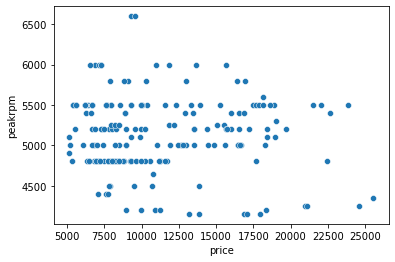

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


citympg vs Price


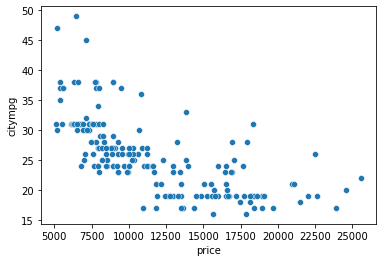

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


highwaympg vs Price


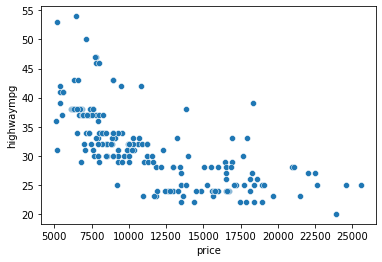

In [50]:
for i in IDVN.columns:
    print(i,'vs Price')
    sns.scatterplot(data.price,IDVN[i])
    plt.show()

#### The dependent variable - price is not linearly varying with the independent variables.

#### Significance check of the Numerical Independent variables with Dependent variable

In [51]:
data.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.500714,-0.315949,-0.188573,-0.534584,-0.199512,-0.101547,-0.146960,0.071304,-0.150015,0.086894,0.225303,-0.054024,0.006412,-0.096508
wheelbase,-0.500714,1.000000,0.856133,0.785391,0.625567,0.770561,0.549187,0.503936,0.030578,0.261929,0.369008,-0.280935,-0.452782,-0.503388,0.652122
carlength,-0.315949,0.856133,1.000000,0.831563,0.525505,0.871013,0.678219,0.593409,0.040910,0.156672,0.559713,-0.233480,-0.644130,-0.659148,0.731277
carwidth,-0.188573,0.785391,0.831563,1.000000,0.323661,0.826910,0.677174,0.521113,0.137502,0.165562,0.603288,-0.150634,-0.611503,-0.629875,0.774570
carheight,-0.534584,0.625567,0.525505,0.323661,1.000000,0.369104,0.153191,0.202006,-0.124903,0.251174,-0.052138,-0.295835,-0.073112,-0.121763,0.225958
curbweight,-0.199512,0.770561,0.871013,0.826910,0.369104,1.000000,0.826954,0.624291,0.092591,0.141683,0.740524,-0.230668,-0.734855,-0.764275,0.843003
enginesize,-0.101547,0.549187,0.678219,0.677174,0.153191,0.826954,1.000000,0.573581,0.249625,0.054275,0.762257,-0.302684,-0.614226,-0.622042,0.730507
boreratio,-0.146960,0.503936,0.593409,0.521113,0.202006,0.624291,0.573581,1.000000,-0.093642,-0.008682,0.492303,-0.294722,-0.523512,-0.537948,0.494913
stroke,0.071304,0.030578,0.040910,0.137502,-0.124903,0.092591,0.249625,-0.093642,1.000000,0.175789,0.130759,0.009979,-0.019627,-0.001720,0.035950
compressionratio,-0.150015,0.261929,0.156672,0.165562,0.251174,0.141683,0.054275,-0.008682,0.175789,1.000000,-0.272767,-0.426651,0.368078,0.315765,0.093315


<AxesSubplot:>

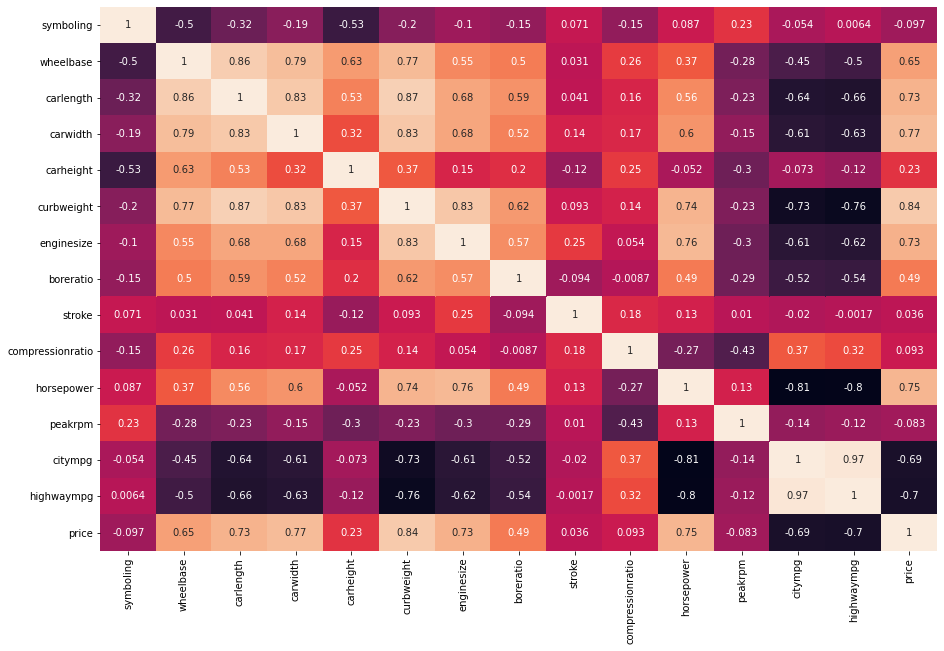

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cbar=False)

In [53]:
Correlation=0
Pvalue=0
for i in IDVN.columns:
    Correlation,Pvalue=pearsonr(DV,IDVN[i])
    print('Correlation between Price and ',i)
    print('Correlation',Correlation,',','Pvalue',Pvalue)
    if Pvalue>0.05:
        print('Not significant\n There is no correlation between price and', i)
    else:
        print('Significant\n There is a correlation between price and', i)
    print('-'*50)

Correlation between Price and  symboling
Correlation -0.09650813897942881 , Pvalue 0.18766935256806644
Not significant
 There is no correlation between price and symboling
--------------------------------------------------
Correlation between Price and  wheelbase
Correlation 0.6521217547942023 , Pvalue 3.800576908605695e-24
Significant
 There is a correlation between price and wheelbase
--------------------------------------------------
Correlation between Price and  carlength
Correlation 0.7312768352328198 , Pvalue 9.862608564000904e-33
Significant
 There is a correlation between price and carlength
--------------------------------------------------
Correlation between Price and  carwidth
Correlation 0.77457000837836 , Pvalue 7.443231493983158e-39
Significant
 There is a correlation between price and carwidth
--------------------------------------------------
Correlation between Price and  carheight
Correlation 0.2259579399455539 , Pvalue 0.0018211866258747494
Significant
 There is a 

#### The variables wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,citympg and highwaympg are correlated with price and hence have a significant impact on the pricing decisions.





### Multicollinearity Check - Correlation between the independent variables

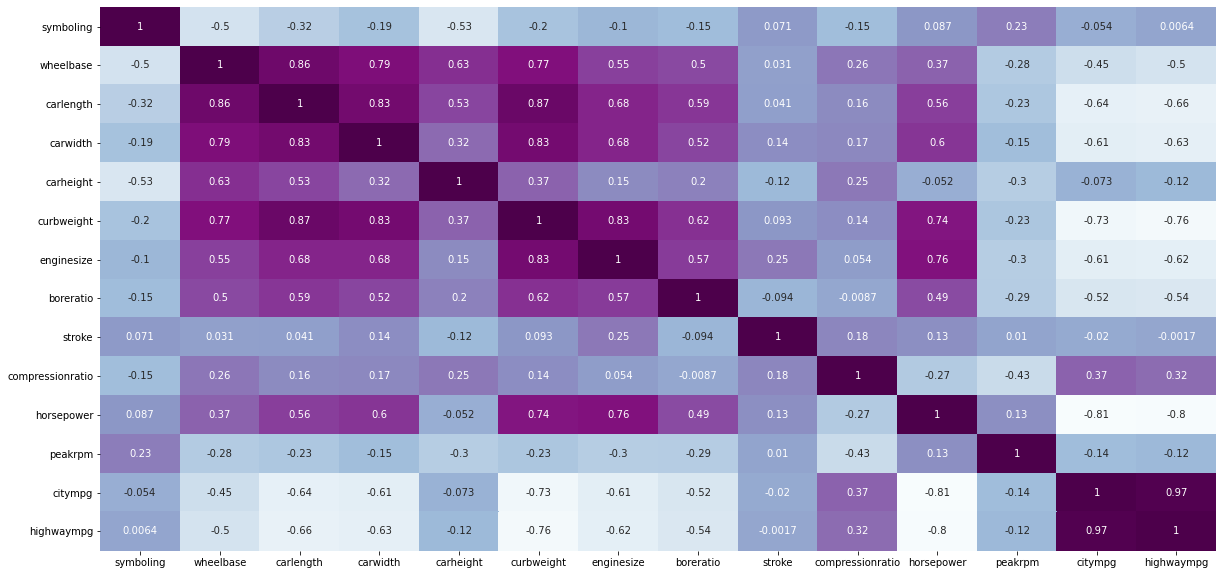

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(IDVN.corr(), annot= True, cbar=False,cmap='BuPu')
plt.show()
#you kindly understand this graph and explian me :(

In [55]:
IDVN.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.500714,-0.315949,-0.188573,-0.534584,-0.199512,-0.101547,-0.146960,0.071304,-0.150015,0.086894,0.225303,-0.054024,0.006412
wheelbase,-0.500714,1.000000,0.856133,0.785391,0.625567,0.770561,0.549187,0.503936,0.030578,0.261929,0.369008,-0.280935,-0.452782,-0.503388
carlength,-0.315949,0.856133,1.000000,0.831563,0.525505,0.871013,0.678219,0.593409,0.040910,0.156672,0.559713,-0.233480,-0.644130,-0.659148
carwidth,-0.188573,0.785391,0.831563,1.000000,0.323661,0.826910,0.677174,0.521113,0.137502,0.165562,0.603288,-0.150634,-0.611503,-0.629875
carheight,-0.534584,0.625567,0.525505,0.323661,1.000000,0.369104,0.153191,0.202006,-0.124903,0.251174,-0.052138,-0.295835,-0.073112,-0.121763
curbweight,-0.199512,0.770561,0.871013,0.826910,0.369104,1.000000,0.826954,0.624291,0.092591,0.141683,0.740524,-0.230668,-0.734855,-0.764275
enginesize,-0.101547,0.549187,0.678219,0.677174,0.153191,0.826954,1.000000,0.573581,0.249625,0.054275,0.762257,-0.302684,-0.614226,-0.622042
boreratio,-0.146960,0.503936,0.593409,0.521113,0.202006,0.624291,0.573581,1.000000,-0.093642,-0.008682,0.492303,-0.294722,-0.523512,-0.537948
stroke,0.071304,0.030578,0.040910,0.137502,-0.124903,0.092591,0.249625,-0.093642,1.000000,0.175789,0.130759,0.009979,-0.019627,-0.001720
compressionratio,-0.150015,0.261929,0.156672,0.165562,0.251174,0.141683,0.054275,-0.008682,0.175789,1.000000,-0.272767,-0.426651,0.368078,0.315765


##### VIF TEST

In [56]:
print('Variance Inflation Factor:\n')
for i in range(len(IDVN.columns)):
    print(f'{IDVN.columns[i]}------------>{vif(IDVN.values,i)}')

Variance Inflation Factor:

symboling------------>2.5588963467989476
wheelbase------------>2489.9122429779663
carlength------------>1883.101650180581
carwidth------------>3284.0343060510936
carheight------------>991.5325966506716
curbweight------------>438.2872052023031
enginesize------------>124.42158243970916
boreratio------------>291.4386206902521
stroke------------>150.37780167319144
compressionratio------------>18.737809565000447
horsepower------------>75.07480782518758
peakrpm------------>231.36245581981098
citympg------------>459.1206233884792
highwaympg------------>561.1892238655468


#### ENCODING

In [ ]:
x[:,0]= encoding.fit_transform(x[:,0])
x[:,1]= encoding.fit_transform(x[:,1])
x[:,2]= encoding.fit_transform(x[:,2])
x[:,3]= encoding.fit_transform(x[:,3])
x[:,4]= encoding.fit_transform(x[:,4])
x[:,5]= encoding.fit_transform(x[:,5])
x[:,6]= encoding.fit_transform(x[:,6])
x[:,7]= encoding.fit_transform(x[:,7])
x[:,8]= encoding.fit_transform(x[:,8])

### Train_test_split

In [57]:
X= data.select_dtypes(exclude='category').iloc[:,0:-1]
X
Y=data.iloc[:,-1]
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 188, dtype: float64

In [58]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,random_state=1,test_size=0.2)

### Model Building

In [59]:
lm=LinearRegression()

In [60]:
lm.fit(xtrain,ytrain)

LinearRegression()

### Model Prediction

In [61]:
train_pred= lm.predict(xtrain)

In [62]:
test_pred= lm.predict(xtest)

### Intercept and Coefficient values

In [78]:
print('Intercept value: ',lm.intercept_)
print('\nCoefficient values: ',)
for a,b in zip(IDVN.columns,lm.coef_):
    print(a,':',b)

Intercept value:  -34947.97427492007

Coefficient values: 
symboling : -35.00730931109042
wheelbase : 202.6857444308394
carlength : -77.41743612204836
carwidth : 545.9632449917864
carheight : -76.96079193112531
curbweight : 3.3231022174671345
enginesize : 21.323806158914916
boreratio : -1447.5305858403347
stroke : -1878.3243008630443
compressionratio : 200.59422267568658
horsepower : 47.99852052470962
peakrpm : 0.3984931281143119
citympg : -355.96002983283523
highwaympg : 276.3164499438098


### Evaluation Metrics

In [69]:
def evaluation(a,b):
    error= mse(a,b)
    print('MSE=',error)
    print('RMSE=', np.sqrt(error))
    


In [70]:
print('Train')
print(evaluation(train_pred,ytrain))
print('\n')
print('Test')
print(evaluation(test_pred,ytest))

Train
MSE= 3966538.2200629264
RMSE= 1991.6169862859992
None


Test
MSE= 6568521.363215933
RMSE= 2562.912671788864
None


In [71]:
print('Train - Rsquared')
print(r2_score(train_pred,ytrain)*100)
print('\n')
print('Test - Rsquared')
print(r2_score(test_pred,ytest)*100)

Train - Rsquared
76.19986869615329


Test - Rsquared
55.176507278449584


##### The model has high variance as the model is overfitting.

In [74]:
train= pd.DataFrame({'ACTUAL':ytrain,'PREDICTED':train_pred, 'ERROR':ytrain-train_pred})
test= pd.DataFrame({'ACTUAL':ytest,'PREDICTED':test_pred, 'ERROR':ytest-test_pred})

<AxesSubplot:>

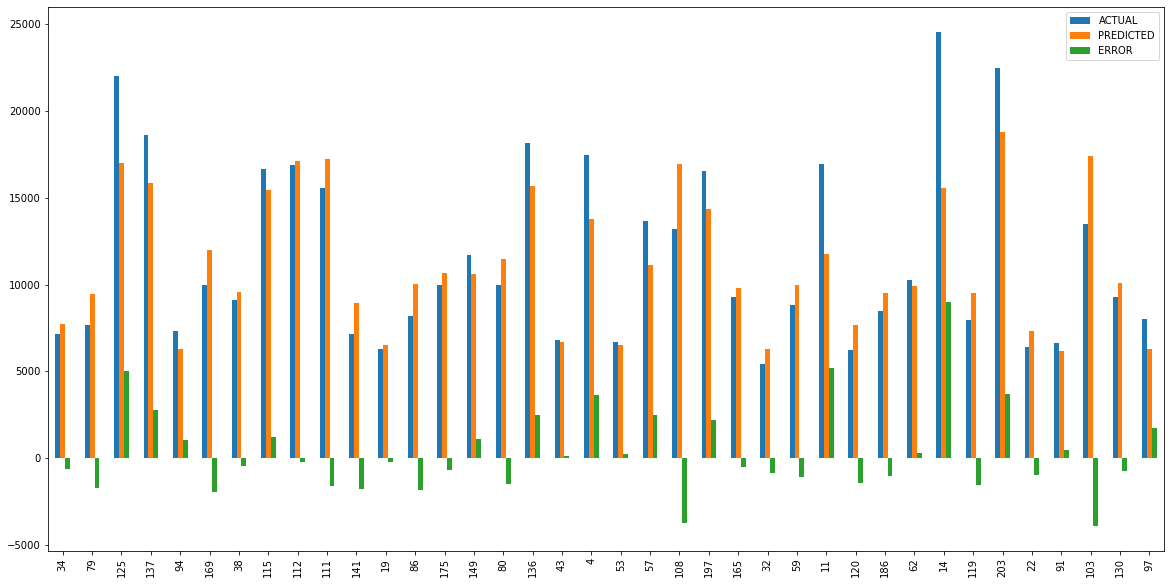

In [75]:
test= pd.DataFrame({'ACTUAL':ytest,'PREDICTED':test_pred, 'ERROR':ytest-test_pred})
test.plot.bar(figsize=(20,10))

In [76]:
xtrain1 =sm.add_constant(xtrain)

In [77]:
sm.OLS(ytrain,xtrain1).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     40.52
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.31e-41
Time:                        20:26:37   Log-Likelihood:                -1352.3
No. Observations:                 150   AIC:                             2735.
Df Residuals:                     135   BIC:                             2780.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.495e+04   1.27e+04     -2.752      0.007   -6.01e+04   -9828.796
symboling          -35.0073    181.124     -0.193      0.847    -393.216     323.201
wheelbase          202.6857     85.419      2.373      0.019      33.753     371.618
carlength          -77.4174     45.101     -1.717      0.088    -166.613      11.778
carwidth           545.9632    209.831      2.602      0.010     130.983     960.944
carheight          -76.9608    108.602     -0.709      0.480    -291.742     137.821
curbweight           3.3231      1.395      2.383      0.019       0.565       6.081
enginesize          21.3238     15.786      1.351      0.179      -9.897      52.544
boreratio        -1447.5306    934.746     -1.549      0.124   -3296.170     401.109
stroke           -1878.3243    645.882     -2.908      0.004   -3155.681    -600.968
compressionratio   200.5942     67.842      2.957      0.004      66.423     334.765
horsepower          47.9985     15.188      3.160      0.002      17.962      78.035
peakrpm              0.3985      0.536      0.744      0.458      -0.661       1.458
citympg           -355.9600    137.480     -2.589      0.011    -627.853     -84.067
highwaympg         276.3164    126.907      2.177      0.031      25.334     527.299
==============================================================================
Omnibus:                       25.216   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.357
Skew:                           0.970   Prob(JB):                     5.71e-08
Kurtosis:                       4.254   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
symboling,carheight,enginesize,boreratio,peakrpm,peakrpm  have highly non-significant columns. Therefore, this columns are not vital to be considered for pricing decisions.